In [13]:
import os
HOME = os.getcwd()
HOME

'/content'

In [10]:
%cd yolov5
!pip install -r requirements.txt  # install

/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 876.6/876.6 kB 51.5 MB/s eta 0:00:00


In [14]:
!unzip dataset.zip

Archive:  dataset.zip
   creating: dataset/test/
   creating: dataset/train/
   creating: dataset/valid/
   creating: dataset/test/images/
   creating: dataset/test/labels/
   creating: dataset/train/images/
   creating: dataset/train/labels/
   creating: dataset/valid/images/
   creating: dataset/valid/labels/
  inflating: dataset/data.yaml       
  inflating: dataset/README.dataset.txt  
  inflating: dataset/README.roboflow.txt  
  inflating: dataset/test/images/apple--106-_jpg.rf.5d4cdc6f5bd48667c045a43a5fb3d970.jpg  
  inflating: dataset/test/images/apple--119-_jpg.rf.d7b946189406fa5cb1f936ba2edcfa11.jpg  
  inflating: dataset/test/images/apple--132-_jpg.rf.b38cfb540837f6de31bee356952362ca.jpg  
  inflating: dataset/test/images/apple--178-_jpg.rf.4ca4da2d5e684cd9636f0987633bcf31.jpg  
  inflating: dataset/test/images/apple--179-_jpg.rf.d2a7634cf17537da52c08c32c1fb0172.jpg  
  inflating: dataset/test/labels/apple--106-_jpg.rf.5d4cdc6f5bd48667c045a43a5fb3d970.txt  
  inflating: datas

In [15]:
!rm dataset.zip

In [16]:
%cd yolov5

/content/yolov5


In [22]:
os.path.exists(f"{HOME}/dataset")
f"{HOME}/dataset"


'/content/dataset'

In [25]:
!python train.py --img 416 --epochs 25 --data {HOME}/dataset/data.yaml --weights yolov5s.pt --cache

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-10-19 14:43:29.098765: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-19 14:43:29.121613: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-19 14:43:29.128622: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visual

In [26]:
!python detect.py --weights runs/train/exp4/weights/best.pt --img 416 --conf 0.1 --source {HOME}/dataset/test/images

detect: weights=['runs/train/exp4/weights/best.pt'], source=/content/dataset/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-376-gbcd88eaf Python-3.10.12 torch-2.4.1+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/5 /content/dataset/test/images/apple--106-_jpg.rf.5d4cdc6f5bd48667c045a43a5fb3d970.jpg: 288x416 3 damaged_apples, 212.6ms
image 2/5 /content/dataset/test/images/apple--119-_jpg.rf.d7b946189406fa5cb1f936ba2edcfa11.jpg: 224x416 3 damaged_apples, 138.2ms
image 3/5 /content/dataset/test/images/apple--132-_jpg.rf.b38cfb54083

In [28]:
!pwd

/content/yolov5


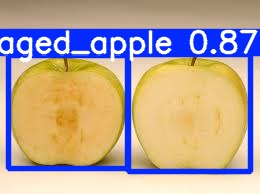

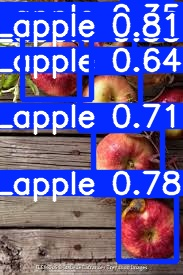

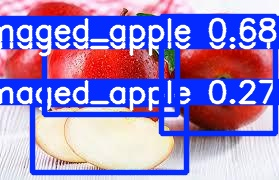

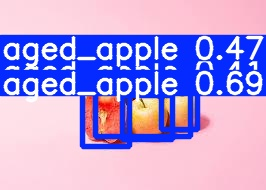

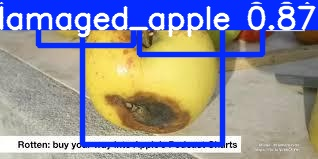

In [29]:
from IPython.display import Image,display
import os
# Directory containing the result images
result_dir = 'runs/detect/exp'

# Loop through and display all images in the folder
for img_file in os.listdir(result_dir):
    display(Image(filename=os.path.join(result_dir, img_file)))